In [5]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

dir_path = "C:/Users/namra/Practicum Dataset/user_data/user01/1598832660/"

In [6]:
data = pd.read_csv(dir_path+"1598832660_combined.csv")

In [7]:
data.action.unique()

array(['household', 'travel', 'personal_care', 'meal', 'recreation_media',
       'work', 'study'], dtype=object)

<Axes: xlabel='action'>

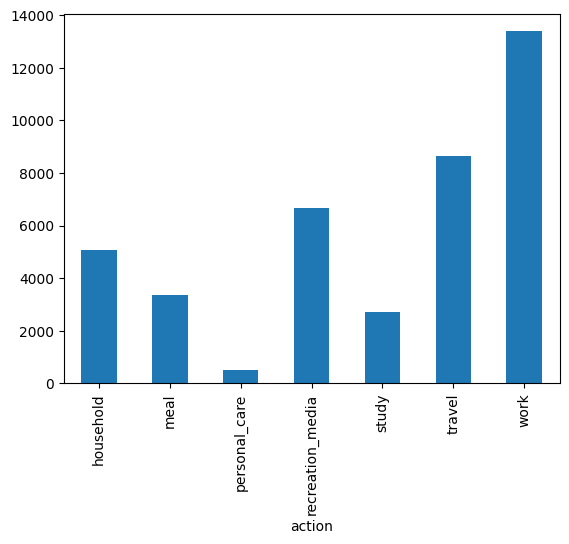

In [8]:
data.groupby('action')['timestamp'].count().plot(kind='bar')

In [9]:
data.groupby('action')['timestamp'].count()

action
household            5076
meal                 3347
personal_care         530
recreation_media     6688
study                2724
travel               8639
work                13379
Name: timestamp, dtype: int64

In [16]:
def correlationForActivity(data_in,path):
    corrmat = data_in.loc[:,data_in.columns[1:-2]].corr()
    sns.set_style('whitegrid')
    plt.figure(figsize=(50,50))
    plt.yticks(fontsize=20)
    plt.xticks(fontsize=20)
    sns.heatmap(corrmat,annot=True)
    plt.savefig(path)


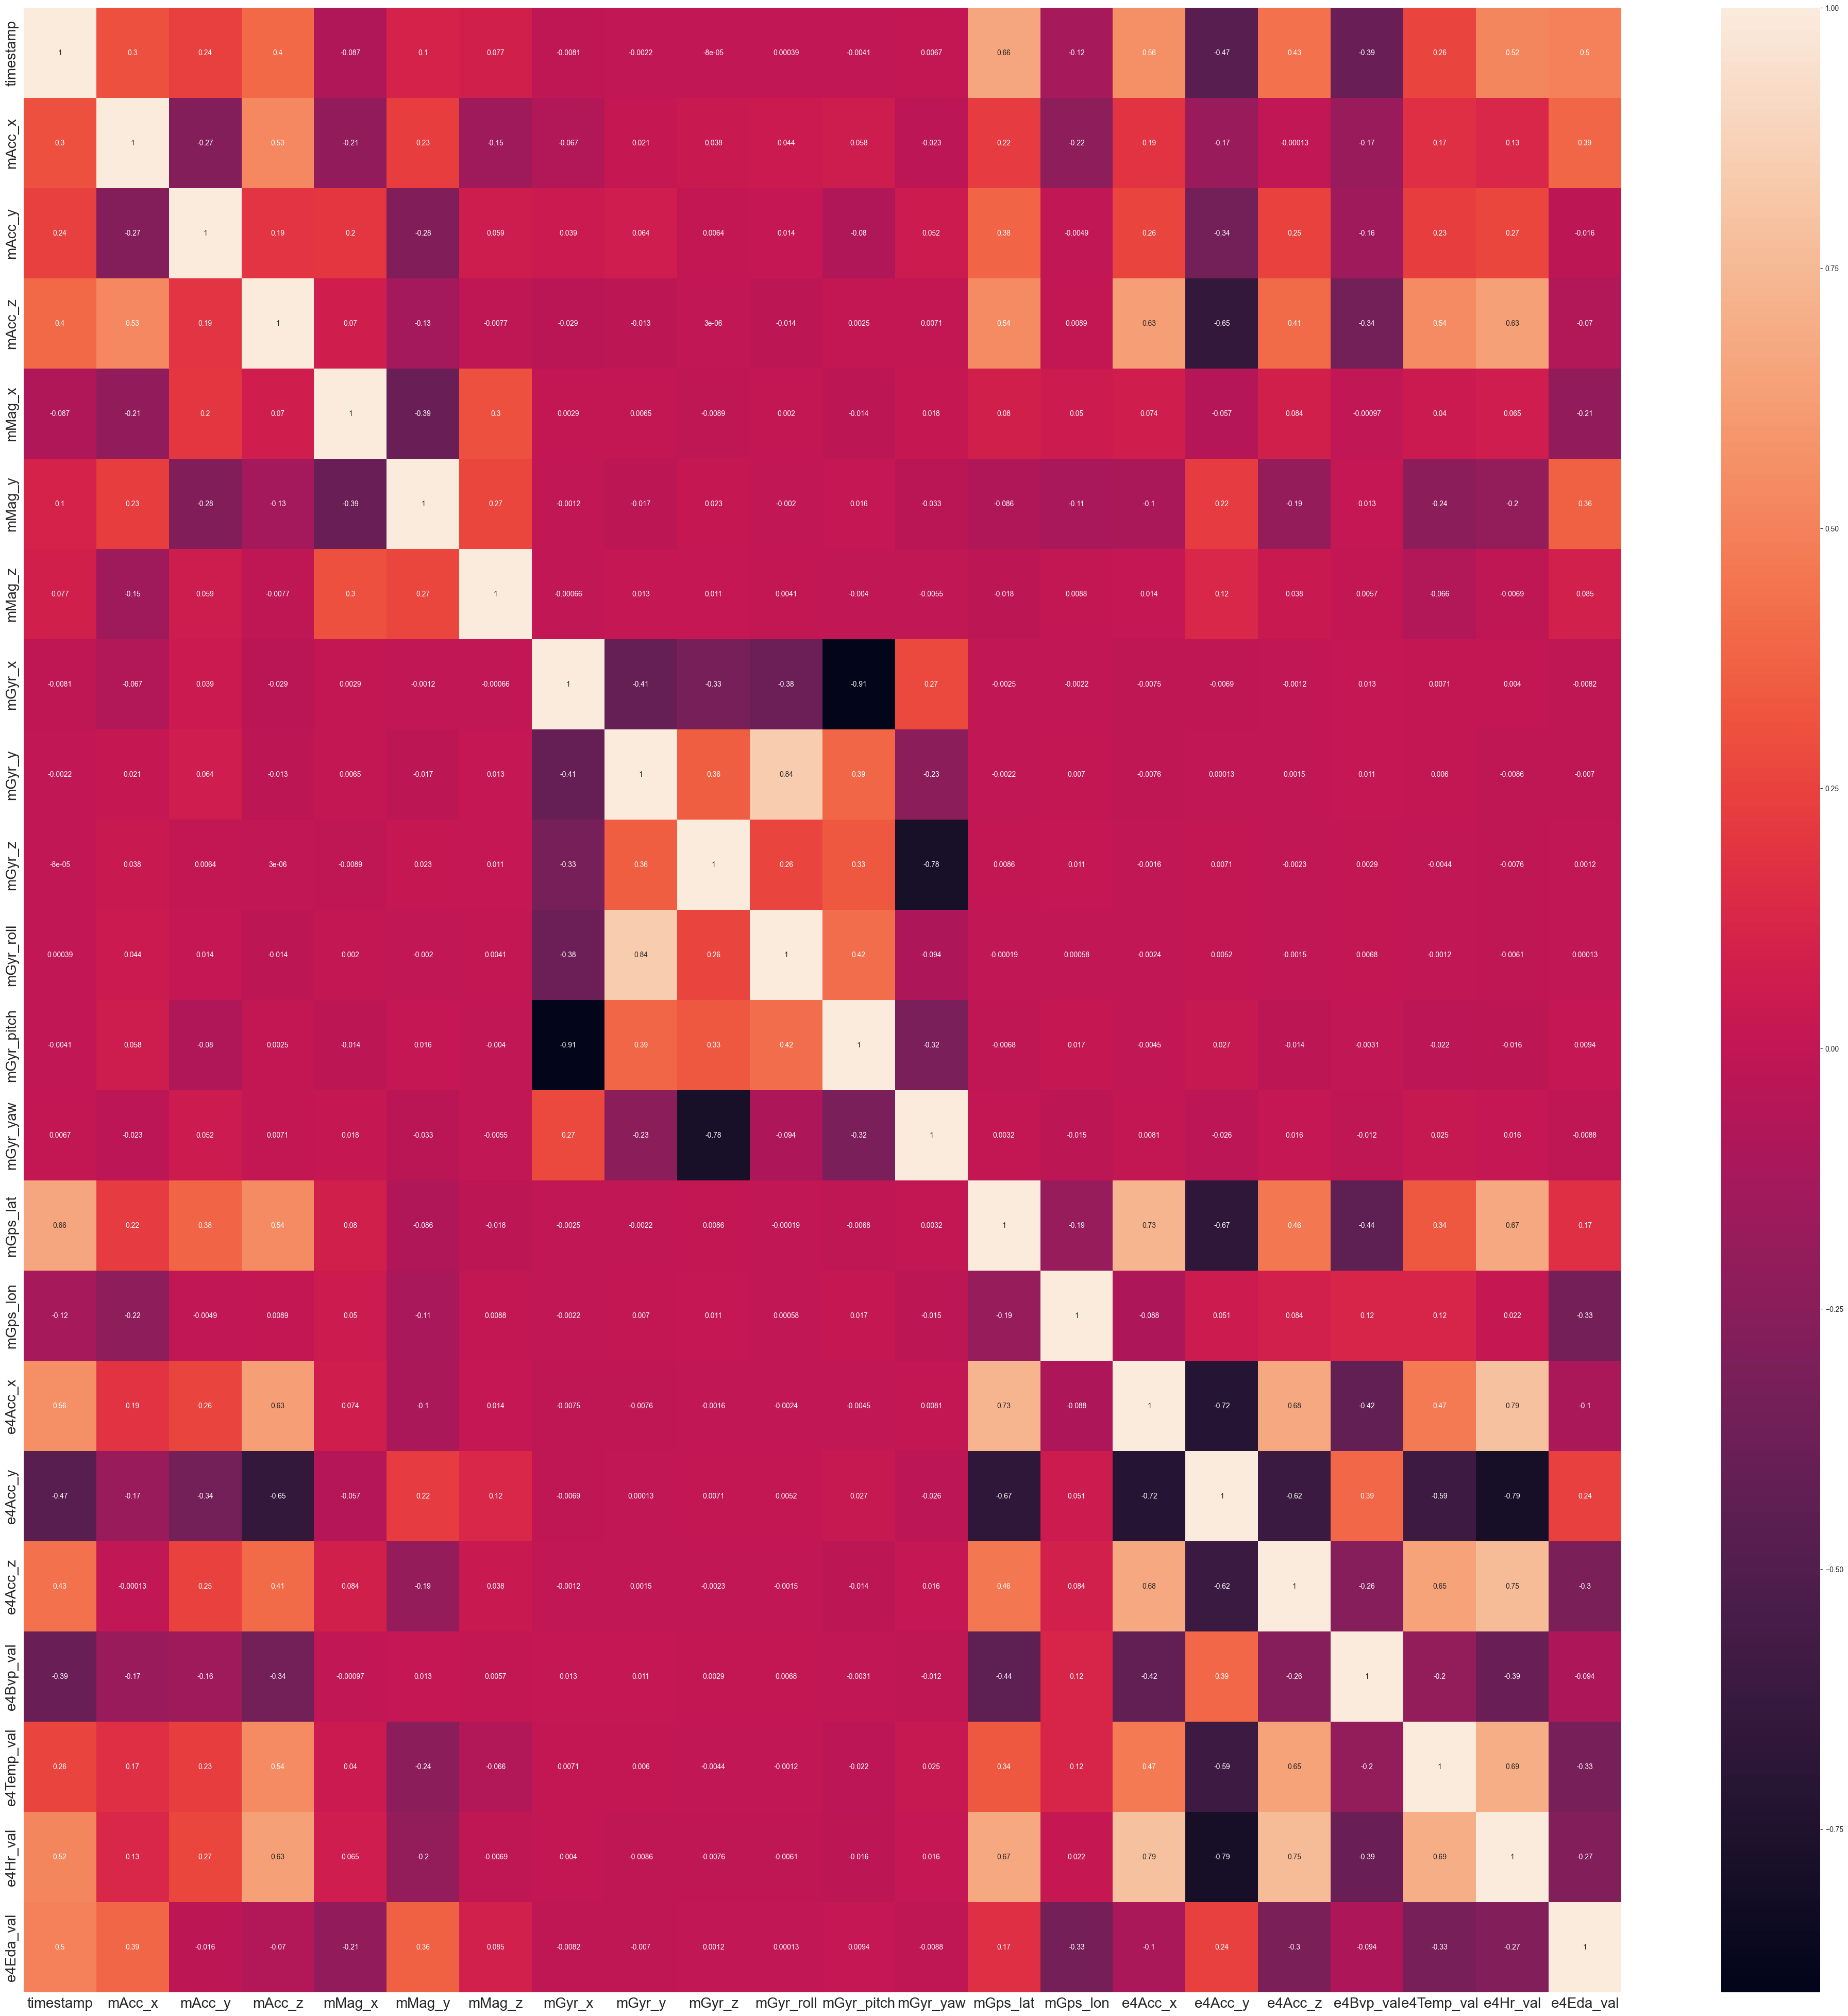

In [13]:
correlationForActivity(data_in = data, path=dir_path+'correlationPlot.png')

In [14]:
data.drop(columns=['mGyr_roll', 'mGyr_pitch', 'mGyr_yaw', 'e4Acc_x', 'e4Acc_y', 'e4Acc_z'],inplace=True)

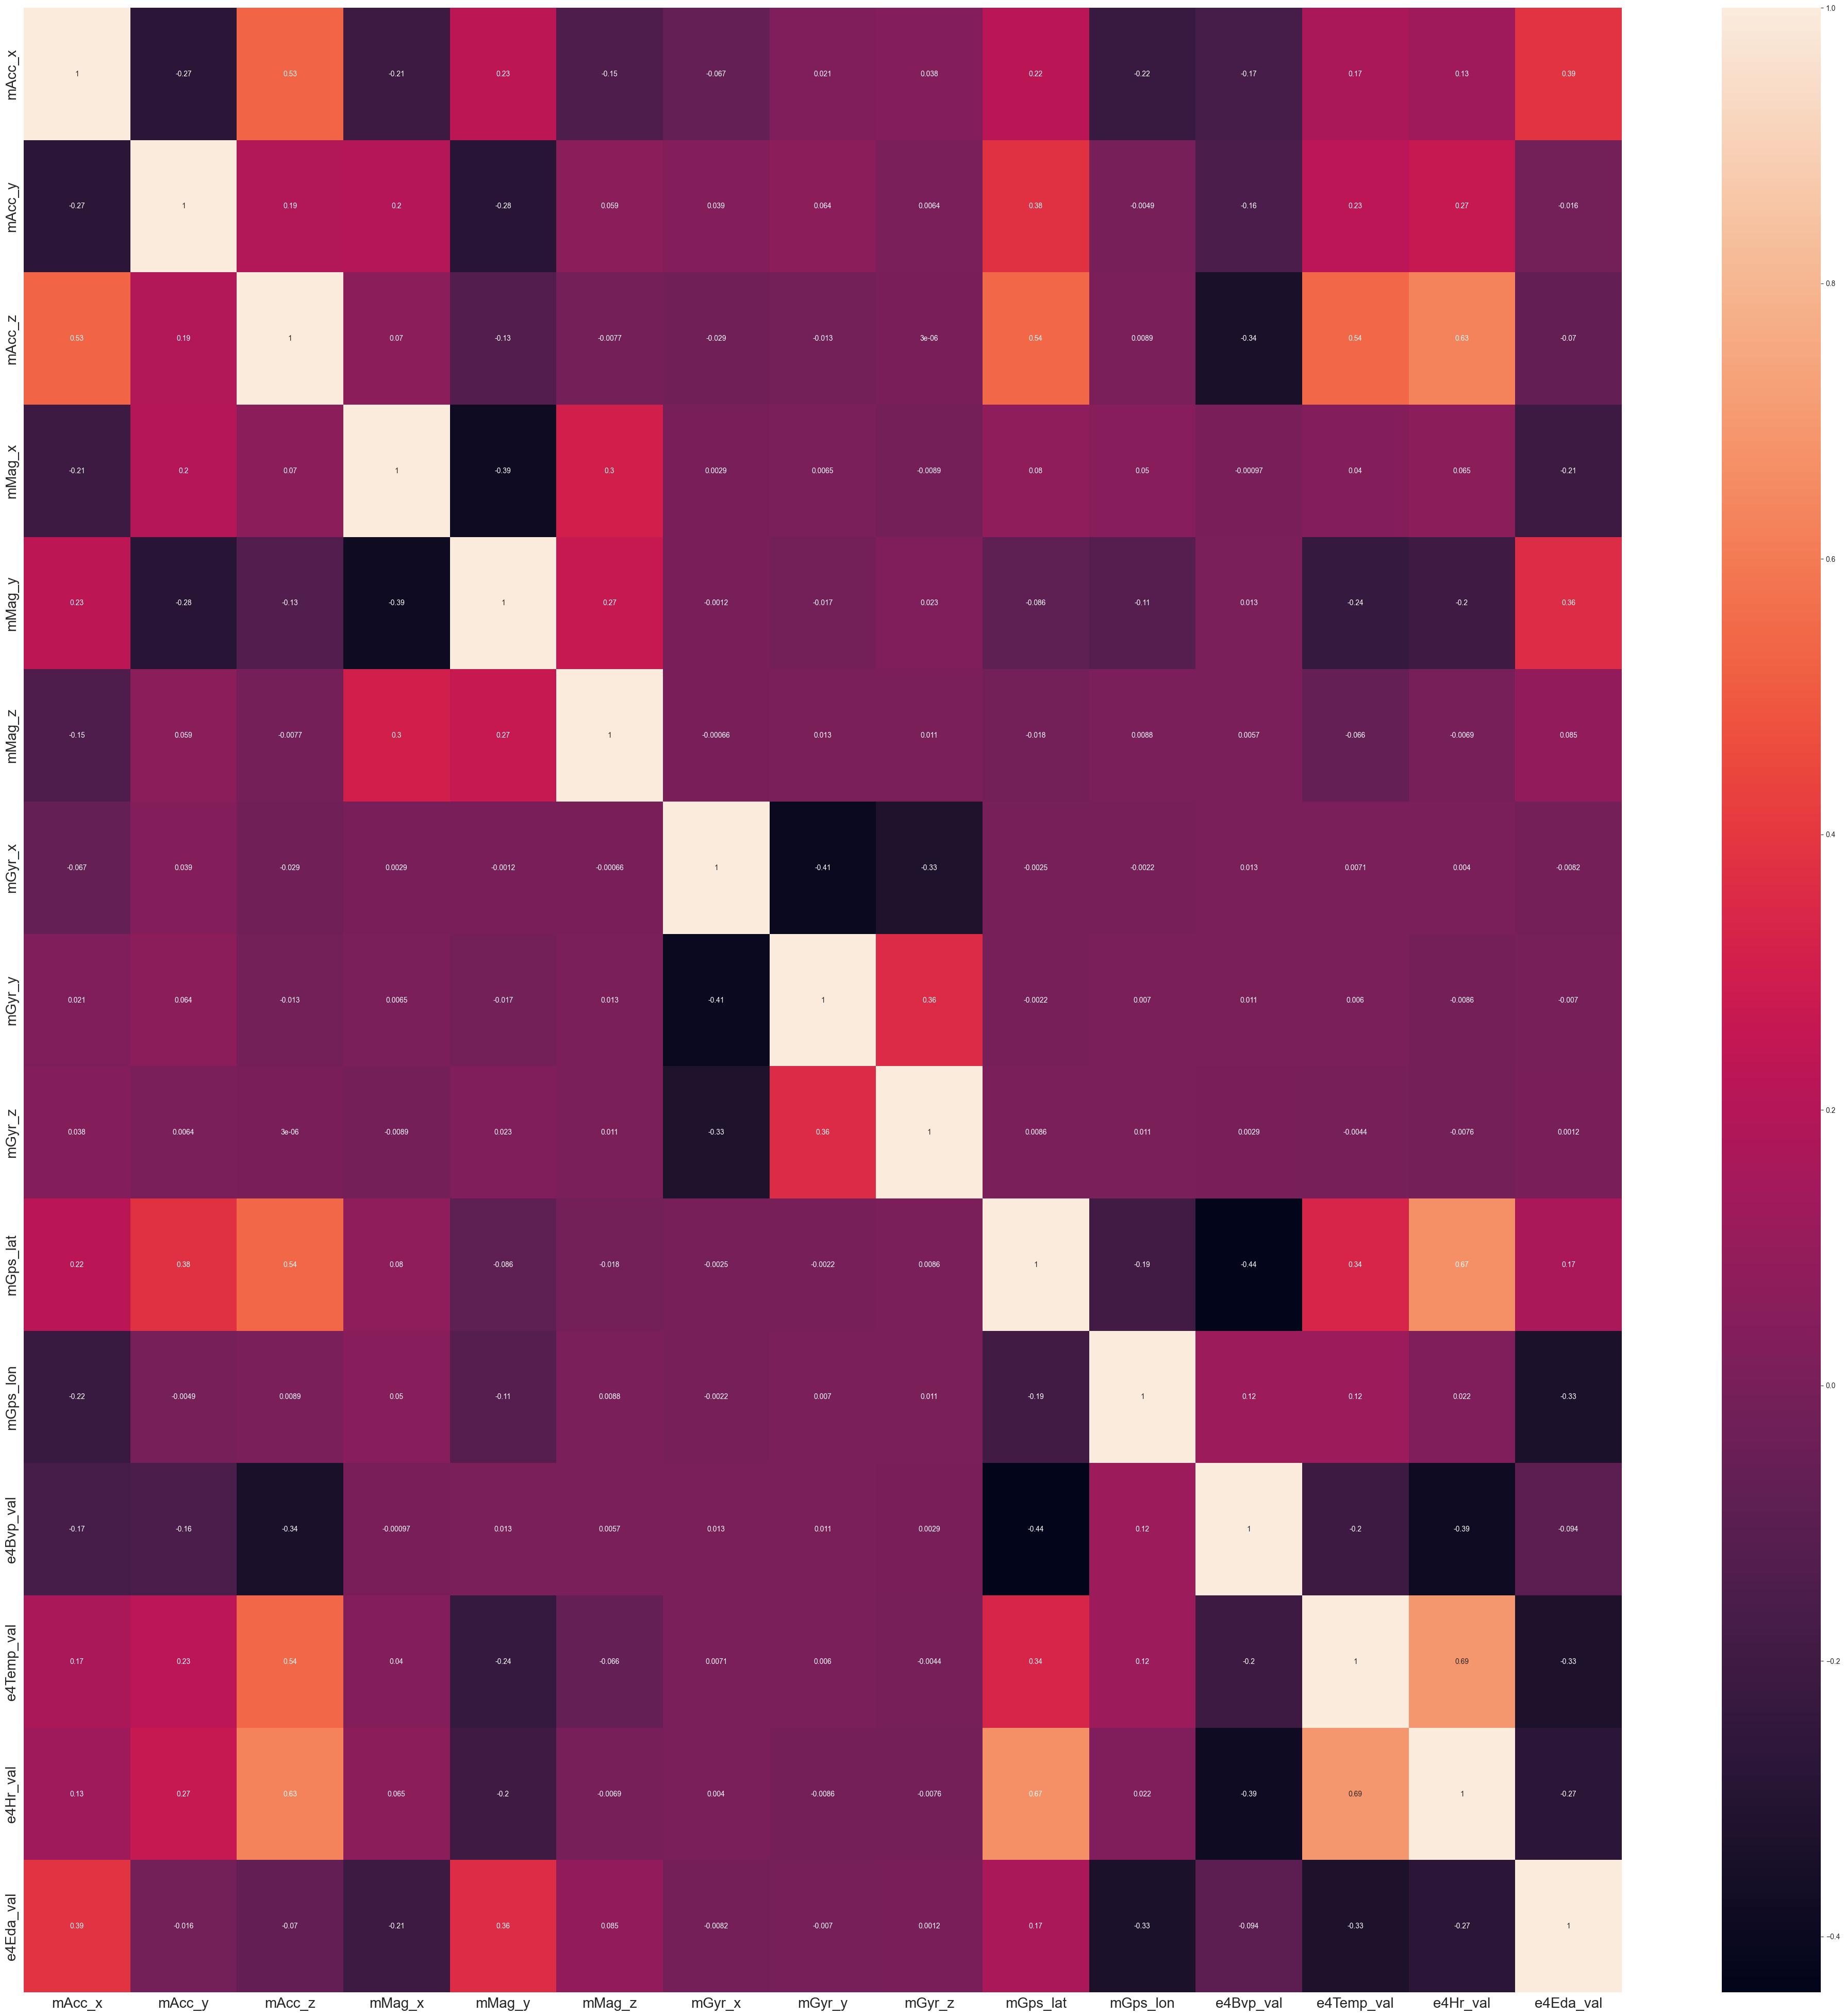

In [17]:
correlationForActivity(data_in = data, path=dir_path+'correlationPlot.png')

In [19]:
dataVar_total = data.iloc[:,1:-2].var().transpose().sort_values(ascending=False)
dataVar_act = data.iloc[:,1:-2].groupby(data.action).var(0).transpose()

In [20]:
dataVar_act

action,household,meal,personal_care,recreation_media,study,travel,work
mAcc_x,3.418845,8.807592,5.292367e+00,1.236253e+00,1.545409e+00,6.080690,1.092463e+00
mAcc_y,25.359353,31.471872,1.233877e+01,1.111935e+01,1.808340e-01,19.755584,6.023640e+00
mAcc_z,25.677289,53.246837,2.209811e+01,1.233906e+01,1.467605e-01,20.603306,1.463853e+01
mMag_x,27430.488199,78584.083570,1.115508e+03,6.881383e+03,9.677789e+03,10321.031444,1.312577e+04
mMag_y,3713.289955,12743.465962,1.301553e+03,3.765534e+02,6.949034e+03,6876.448686,1.643017e+03
mMag_z,3534.492456,3809.526350,2.967791e+02,3.237750e+02,1.974906e+04,4254.644567,2.830719e+03
mGyr_x,0.116338,0.535141,1.553714e-01,1.853355e-01,1.773609e-03,0.177156,7.899056e-02
mGyr_y,0.178870,0.322661,1.623428e-01,1.194458e-01,2.658967e-03,0.143272,5.654192e-02
mGyr_z,0.069141,0.165056,2.166967e-01,5.913272e-02,2.496660e-03,0.061438,2.968728e-02
mGps_lat,0.002795,0.000002,7.007323e-09,5.011883e-07,4.087070e-09,0.002825,4.567069e-07


<Figure size 1000x1000 with 0 Axes>

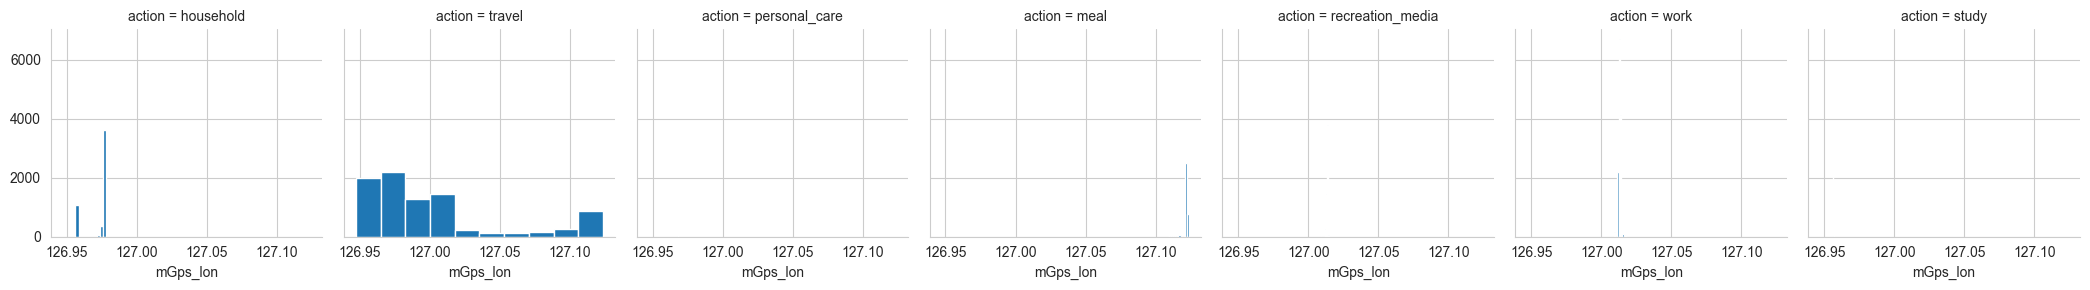

In [21]:
plt.figure(figsize=(10,10))
sns.set_style('whitegrid')
g = sns.FacetGrid(data,col='action')
g.map(plt.hist,'mGps_lon')

<Figure size 1000x1000 with 0 Axes>

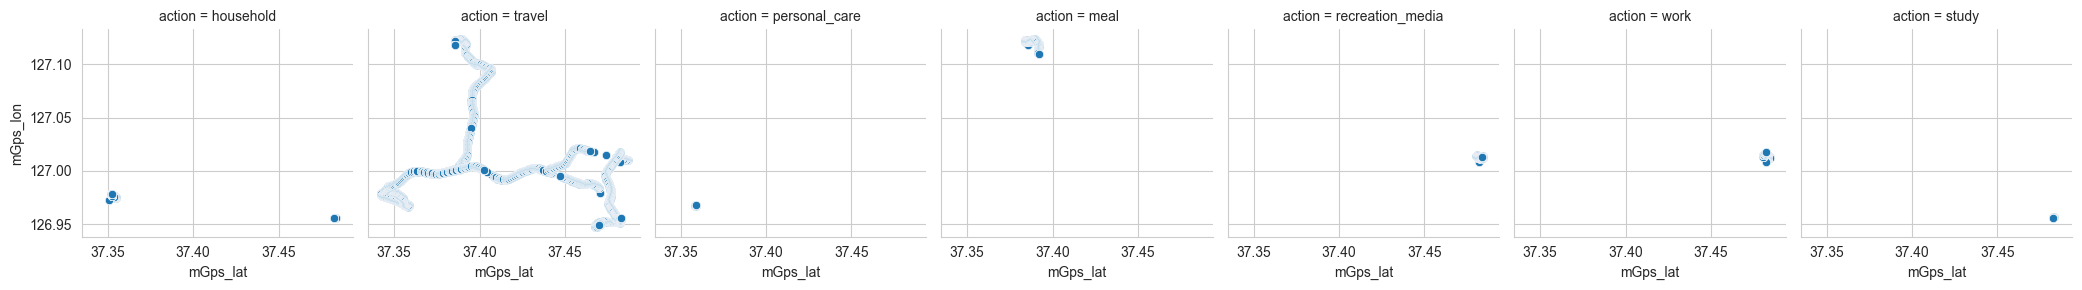

In [22]:
plt.figure(figsize=(10,10))
sns.set_style('whitegrid')
g = sns.FacetGrid(data,col='action')
g.map(sns.scatterplot,'mGps_lat',"mGps_lon")

<Axes: xlabel='action'>

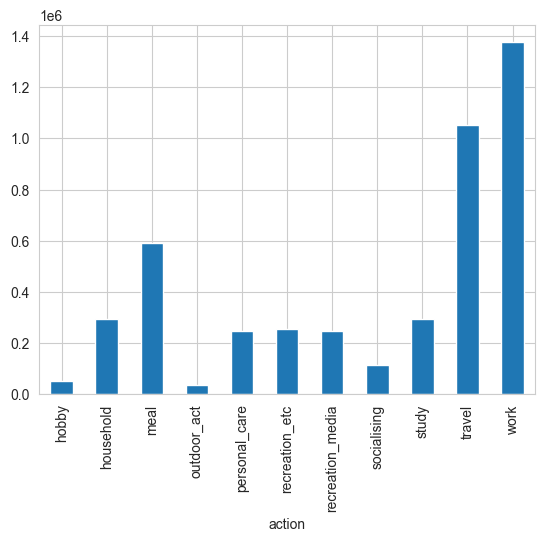

In [69]:
data.columns

Index(['timestamp', 'mAcc_x', 'mAcc_y', 'mAcc_z', 'mMag_x', 'mMag_y', 'mMag_z',
       'mGyr_x', 'mGyr_y', 'mGyr_z', 'mGyr_roll', 'mGyr_pitch', 'mGyr_yaw',
       'mGps_lat', 'mGps_lon', 'action'],
      dtype='object')

In [70]:
data.drop(columns=['mGyr_roll', 'mGyr_pitch', 'mGyr_yaw'],inplace=True)

In [71]:
data

,timestamp,mAcc_x,mAcc_y,mAcc_z,mMag_x,mMag_y,mMag_z,mGyr_x,mGyr_y,mGyr_z,mGps_lat,mGps_lon,action
0,1598759880008,-0.318439,-0.172388,9.703996,-6.9,-85.100000,-18.5,-0.000665,-0.002706,-0.002468,37.544851,127.054421,work
1,1598759880054,-0.323227,-0.172388,9.718362,-6.9,-85.100000,-18.5,-0.000665,-0.002706,-0.002468,37.544851,127.054421,work
2,1598759880075,-0.332804,-0.169993,9.699207,-6.9,-85.100000,-18.5,-0.000665,-0.002706,-0.002468,37.544851,127.054421,work
3,1598759880108,-0.316044,-0.184359,9.720756,-6.9,-85.100000,-18.5,-0.000665,-0.002706,-0.002468,37.544851,127.054421,work
4,1598759880135,-0.323227,-0.158022,9.687236,-6.9,-85.100000,-18.5,-0.000665,-0.002706,-0.002468,37.544851,127.054421,work
...,...,...,...,...,...,...,...,...,...,...,...,...,...
774307,1598795999845,-0.311256,-0.179571,9.713572,-32.0,18.300001,-23.4,0.002714,0.000519,-0.001157,37.482458,126.956318,meal
774308,1598795999890,-0.337593,-0.172388,9.718362,-32.0,18.300001,-23.5,-0.000951,0.000519,-0.000546,37.482458,126.956318,meal
774309,1598795999915,-0.316044,-0.162811,9.696813,-31.9,18.300001,-23.5,-0.001562,-0.001313,0.000676,37.482458,126.956318,meal
774310,1598795999946,-0.325621,-0.162811,9.713572,-31.9,18.200000,-23.5,0.000881,-0.000092,0.000065,37.482458,126.956318,meal


In [72]:
data.to_csv(dir_path+"assn_dataset.csv",index=False)